# Try to access one PO.DAAC data file in the cloud, and then multiple files


These tutorials seem helpful:
https://github.com/podaac/tutorials/blob/master/notebooks/s3/S3-Access.ipynb
https://github.com/podaac/ECCO/blob/main/Data_Access/cloud_direct_access_s3.ipynb
https://github.com/podaac/tutorials/blob/master/notebooks/Pre-SWOT_Numerical_Simulation_Demo.ipynb


Working from this tutorial to try to read in one file:
https://github.com/podaac/tutorials/blob/master/notebooks/s3/S3-Access.ipynb



In [1]:
import boto3
import json
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # import projections
import cartopy

%matplotlib inline
# %matplotlib inline
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['figure.dpi'] = 300


## Authenticate with EDL and retrieve temporary S3 credentials:

You need a temporary S3 credential to access data in the cloud from within the AWS us-west-2 region. To do this, we use our earthdata login when calling a special API endpoint to receive this temporary token.

Visit https://archive.podaac.earthdata.nasa.gov/s3credentials to get your access_key, secrect_access_key, and token. Paste the response into the s3_credential area below.


In [48]:
# Paste the result of your accessing and login to the s3Credential endpoint above into the 's3_credential' variable here:
s3_credential = '{"accessKeyId": "***", "secretAccessKey": "****", "sessionToken": "********", "expiration": "2021-11-17 04:01:46+00:00"}'
creds = json.loads(s3_credential)

In [49]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=creds["accessKeyId"],
    aws_secret_access_key=creds["secretAccessKey"],
    aws_session_token=creds["sessionToken"]
)

The "prefix" below is the dataset shortname, which can be found from the PO.DAAC data catalog under the "information" tab, e.g., as here:
https://podaac.jpl.nasa.gov/dataset/AVHRRF_MA-STAR-L2P-v2.80?ids=&values=&search=AVHRRF_MA-STAR-L2P-v2.80&provider=PODAAC

Some valide prefixes ("short names"):
VIIRS_N20-OSPO-L2P-v2.61
AVHRRMTA_G-NAVO-L2P-v2.0

I guess we are just listing files here, but this will only list 1000 files:

In [50]:
bucket="podaac-ops-cumulus-protected"
prefix="VIIRS_N20-OSPO-L2P-v2.61/" # "AVHRRMTA_G-NAVO-L2P-v2.0/"

contents = s3_client.list_objects(Bucket=bucket, Prefix=prefix)

In [60]:
# This is a lot of files, if you really want to list them out, remove the string block markers ('''):

for obj in contents['Contents']:
    print(obj['Key'])


VIIRS_N20-OSPO-L2P-v2.61/20180105000000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc
VIIRS_N20-OSPO-L2P-v2.61/20180105000000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc.dmrpp
VIIRS_N20-OSPO-L2P-v2.61/20180105001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc
VIIRS_N20-OSPO-L2P-v2.61/20180105001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc.dmrpp
VIIRS_N20-OSPO-L2P-v2.61/20180105002000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc
VIIRS_N20-OSPO-L2P-v2.61/20180105002000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc.dmrpp
VIIRS_N20-OSPO-L2P-v2.61/20180105003000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc
VIIRS_N20-OSPO-L2P-v2.61/20180105003000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc.dmrpp
VIIRS_N20-OSPO-L2P-v2.61/20180105004000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc
VIIRS_N20-OSPO-L2P-v2.61/201801

I found a solution to list all of the files here:
https://stackoverflow.com/questions/54314563/how-to-get-more-than-1000-objects-from-s3-by-using-list-objects-v2

Here is the way to list more than 1000 files:


In [5]:
paginator = s3_client.get_paginator('list_objects')
pages = paginator.paginate(Bucket=bucket, Prefix=prefix)

# This is really a lot of files, if you really want to list them out, remove the string block markers ('''):
'''
for page in pages:
    for obj in page['Contents']:
        print(obj['Key'])
''';

In [65]:
# s3_client.download_file("podaac-ops-cumulus-protected", "AVHRRMTA_G-NAVO-L2P-v2.0/20200629044608-NAVO-L2P_GHRSST-SST1m-AVHRRMTA_G-v02.0-fv02.0.nc","data_out.nc")
# s3_client.download_file("podaac-ops-cumulus-protected", "AVHRRMTA_G-NAVO-L2P-v2.0/20211104094915-NAVO-L2P_GHRSST-SST1m-AVHRRMTA_G-v02.0-fv02.0.nc","data_out.nc")
s3_client.download_file(bucket, prefix+"20180106032000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc","data_out2.nc")

In [66]:
ds = xr.open_dataset("data_out2.nc",drop_variables=['dt_analysis','satellite_zenith_angle','brightness_temperature_11um','brightness_temperature_12um','brightness_temperature_08um',])

In [67]:
ds

<xarray.Dataset>
Dimensions:                       (time: 1, nj: 5376, ni: 3200)
Coordinates:
  * time                          (time) datetime64[ns] 2018-01-06T03:20:00
    lat                           (nj, ni) float32 ...
    lon                           (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Data variables:
    sst_dtime                     (time, nj, ni) timedelta64[ns] ...
    sea_surface_temperature       (time, nj, ni) float32 ...
    sses_bias                     (time, nj, ni) float32 ...
    sses_standard_deviation       (time, nj, ni) float32 ...
    sea_ice_fraction              (time, nj, ni) float32 ...
    l2p_flags                     (time, nj, ni) int16 ...
    quality_level                 (time, nj, ni) float32 ...
    wind_speed                    (time, nj, ni) float32 ...
    brightness_temperature_4um    (time, nj, ni) float32 ...
    brightness_temperature_08um6  (time, nj, ni) float32 ...
Attributes: (12/60)
    geospatial_bounds:                        POLYGON(( -52.458 -29.149,  -41...
    geospatial_first_scanline_first_fov_lat:  4.5385675
    geospatial_first_scanline_first_fov_lon:  -41.856106
    geospatial_first_scanline_last_fov_lat:   0.39134815
    geospatial_first_scanline_last_fov_lon:   -14.995805
    geospatial_last_scanline_first_fov_lat:   -29.148561
    ...                                       ...
    time_coverage_end:                        20180106T032959Z
    time_coverage_start:                      20180106T032000Z
    title:                                    VIIRS L2P SST
    uuid:                                     42d76276-1431-11e9-9ff0-ac1f6b5...
    westernmost_longitude:                    -52.458122
    netcdf_version_id:                        4.5.0 of Oct 31 2017 11:38:27 $

In [54]:
xmin, xmax = (-180,1800)
ymin, ymax = (-90, 900)


/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


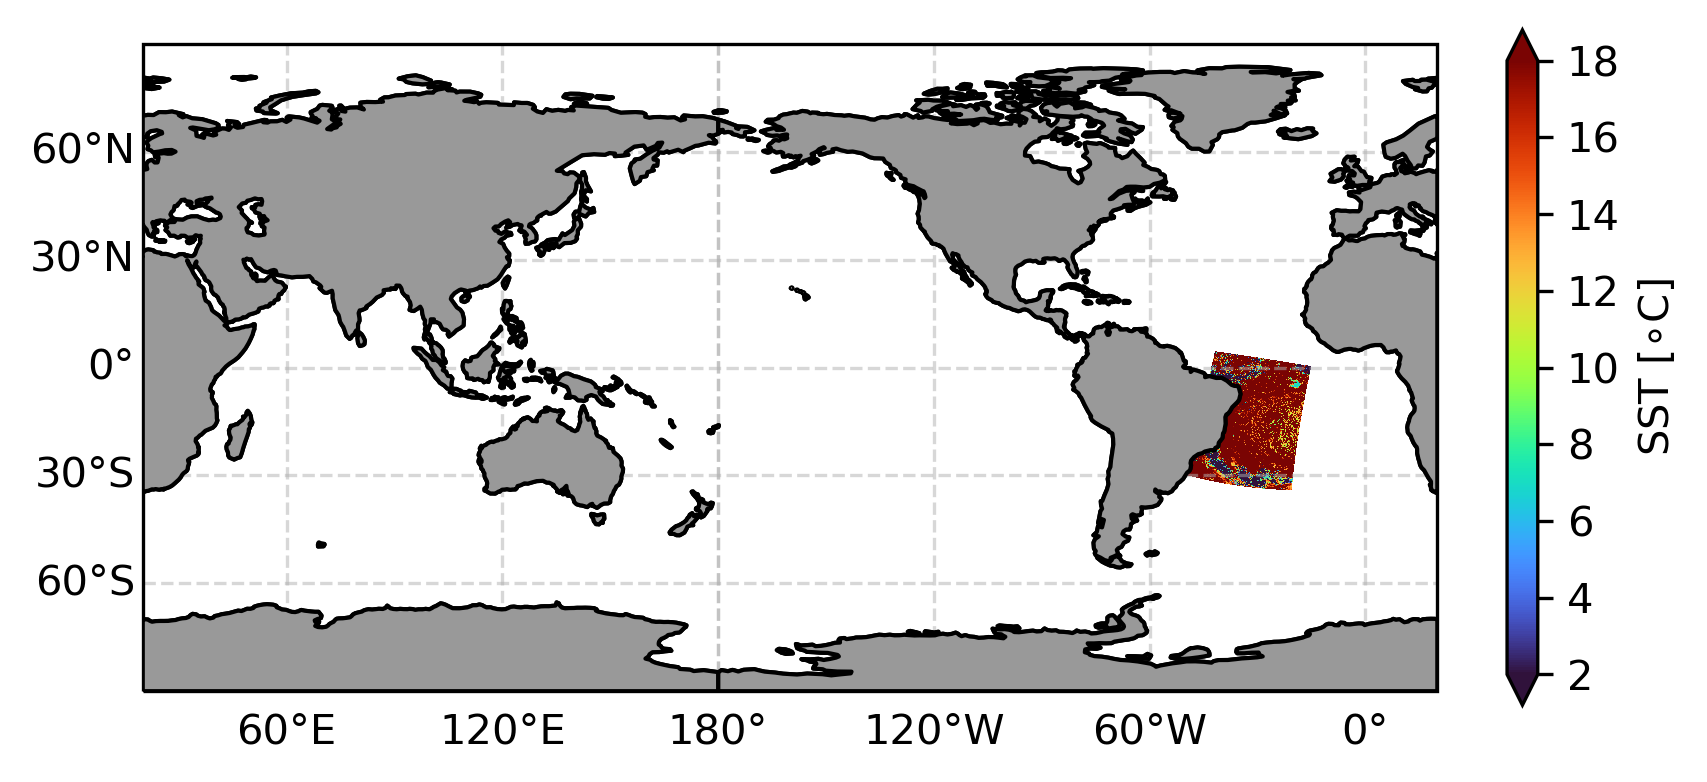

In [68]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=-160))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())

plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
cs = ax.pcolormesh(ds.lon,ds.lat,ds.sea_surface_temperature.squeeze()-273.15,vmin=2,vmax=18,transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SST [$\circ$C]',fontsize = 10)

